                                                             Варіант 1
                                                             
Реалізація множин за допомогою списків. Елементи множини можуть бути довільними та різнорідними(необмежений універсум).

Результат завдання 1-3:

1)Реалізувати тип "множина" згідно з цього завдання
2)Реалізувати базові операції над множинами: включення елементу у множину (Insert), видалення елементу з множини (Delet), перевірку наявності елементу в множині (Search), очистку множини (Clear).
3)Реалізувати додаткові операції над множинами: об'єднання множин(Union), перетин множин(Intersection), різницю множин(SetDifference), симетричну різницю множин(SymDifference), перевірку, чи є одна множина підмножиною іншої (IsSubset).

In [1]:
class Set:
    def __init__(self, elements=None):
        self.elements = set(elements) if elements else set()
    
    def insert(self, element):
        self.elements.add(element)
    
    def delete(self, element):
        if element in self.elements:
            self.elements.remove(element)
        else:
            raise KeyError(f"{element} не знайдено в множині")
    
    def search(self, element):
        return element in self.elements
    
    def clear(self):
        self.elements.clear()
    
    def union(self, other_set):
        return Set(self.elements.union(other_set.elements))
    
    def intersection(self, other_set):
        return Set(self.elements.intersection(other_set.elements))
    
    def set_difference(self, other_set):
        return Set(self.elements.difference(other_set.elements))
    
    def sym_difference(self, other_set):
        return Set(self.elements.symmetric_difference(other_set.elements))
    
    def is_subset(self, other_set):
        return self.elements.issubset(other_set.elements)
    
    def __len__(self):
        return len(self.elements)
    
    def __str__(self):
        return f"Set({list(self.elements)})"
    
    def __iter__(self):
        return iter(self.elements)

# Приклад використання:
s1 = Set([1, 2, 3])
s2 = Set([3, 4, 5])

# Об'єднання множин
union_set = s1.union(s2)
print("Об'єднання s1 та s2:", union_set)  

# Перетин множин
intersection_set = s1.intersection(s2)
print("Перетин s1 та s2:", intersection_set)  
# Різниця множин
difference_set = s1.set_difference(s2)
print("Різниця s1 та s2:", difference_set)  

# Симетрична різниця множин
sym_diff_set = s1.sym_difference(s2)
print("Симетрична різниця s1 та s2:", sym_diff_set) 

# Перевірка на підмножину
s3 = Set([1, 2])
print("Чи є s3 підмножиною s1?", s3.is_subset(s1))  
print("Чи є s1 підмножиною s2?", s1.is_subset(s2))  

s1.insert(4)
print("Після додавання 4:", s1)  

# Пошук елемента
print("Пошук 3:", s1.search(3))  
print("Пошук 5:", s1.search(5))  

# Видалення елемента
s1.delete(2)
print("Після видалення 2:", s1)  

# Очищення множини
s1.clear()
print("Після очищення множини:", s1)  


Об'єднання s1 та s2: Set([1, 2, 3, 4, 5])
Перетин s1 та s2: Set([3])
Різниця s1 та s2: Set([1, 2])
Симетрична різниця s1 та s2: Set([1, 2, 4, 5])
Чи є s3 підмножиною s1? True
Чи є s1 підмножиною s2? False
Після додавання 4: Set([1, 2, 3, 4])
Пошук 3: True
Пошук 5: False
Після видалення 2: Set([1, 3, 4])
Після очищення множини: Set([])


Результат завдання 4:

4) Провести експериментальне визначення часу роботи операції в залежності від розміру множини.

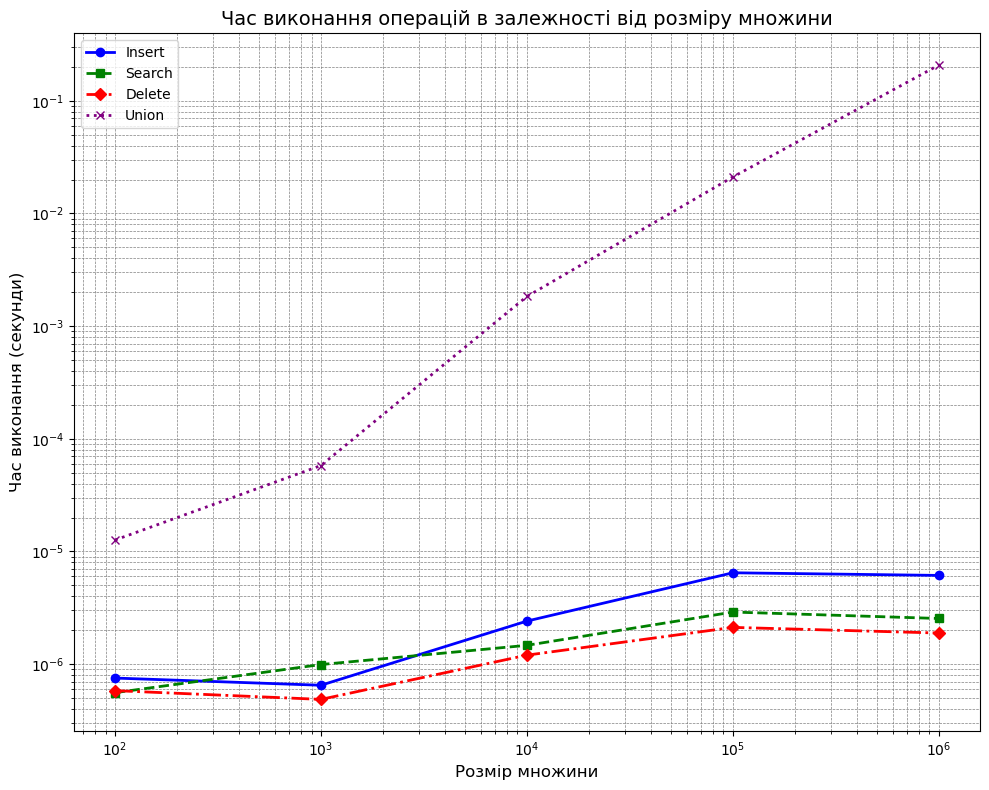

In [18]:
import time
import random
import matplotlib.pyplot as plt

class Set:
    def __init__(self, elements=None):
        self.elements = set(elements) if elements else set()

    def insert(self, element):
        self.elements.add(element)

    def delete(self, element):
        self.elements.discard(element)

    def search(self, element):
        return element in self.elements

    def union(self, other_set):
        return Set(self.elements.union(other_set.elements))


def measure_operation_time(set_size, repetitions=1000):
    total_times = {'insert': 0, 'search': 0, 'delete': 0, 'union': 0}
    
    for _ in range(repetitions):
        elements = list(range(set_size))
        s = Set(elements)
        random_element = random.randint(0, set_size * 2)

        # Insert
        start_time = time.perf_counter()
        s.insert(random_element)
        total_times['insert'] += time.perf_counter() - start_time

        # Search
        start_time = time.perf_counter()
        s.search(random_element)
        total_times['search'] += time.perf_counter() - start_time

        # Delete
        start_time = time.perf_counter()
        s.delete(random_element)
        total_times['delete'] += time.perf_counter() - start_time

        # Union
        other_set = Set(list(range(set_size, set_size * 2)))
        start_time = time.perf_counter()
        s.union(other_set)
        total_times['union'] += time.perf_counter() - start_time

    return {op: total_times[op] / repetitions for op in total_times}


set_sizes = [100, 1000, 10000, 100000, 1000000]

operation_times = {'insert': [], 'search': [], 'delete': [], 'union': []}

for size in set_sizes:
    avg_times = measure_operation_time(size)
    for op in operation_times:
        operation_times[op].append(avg_times[op])

plt.figure(figsize=(10, 8))

line_styles = {
    'insert': {'color': 'blue', 'linestyle': '-', 'marker': 'o', 'label': 'Insert'},
    'search': {'color': 'green', 'linestyle': '--', 'marker': 's', 'label': 'Search'},
    'delete': {'color': 'red', 'linestyle': '-.', 'marker': 'D', 'label': 'Delete'},
    'union': {'color': 'purple', 'linestyle': ':', 'marker': 'x', 'label': 'Union'}
}

plt.style.use('default')
plt.grid(True, which="both", linestyle='--', linewidth=0.5, color='gray')

for op in operation_times:
    plt.plot(set_sizes, operation_times[op], 
             marker=line_styles[op]['marker'], 
             linestyle=line_styles[op]['linestyle'],
             color=line_styles[op]['color'], 
             label=line_styles[op]['label'], linewidth=2, markersize=6)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Розмір множини', fontsize=12)
plt.ylabel('Час виконання (секунди)', fontsize=12)
plt.title('Час виконання операцій в залежності від розміру множини', fontsize=14)
plt.axhline(y=0, color='black', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()


Результат завадння другої частини:

Друга частина завдання повинна оцінити швидкість роботи двох операцій в залежності від потужності множини:

 -перевірку наявності елементу в множині (Search);
 -однієї з операцій Union, Intersection, SetDifference, SymDifference на ваш вибір.(вибираю SymDifference)
 
Зауважимо, що для конкретної оцінки часу виконання необхідно орієнтуватися на такі вимоги:
1) Замір часу необхідно виконувати для випадкових даних, і для кожного експерименту та фіксованих значеннях параметрів необхідно провести щонайменше 1000 експериментів; ітогове значення часу є усередненням від усіх замірів.
2) Дані для експериментів (тобто, випадкові множини заданого розміру) необхідно згенерувати заздалегідь, щоб час генерування не включався у замір.
3) Для аналізу роботи Search доцільно розглянути окремо випадки пошуку елементу, який є у множині, та елемента, якого у множині немає.
4) Отримані результати вручну подати у вигляді графіку "розміру множини - час виконання операції.

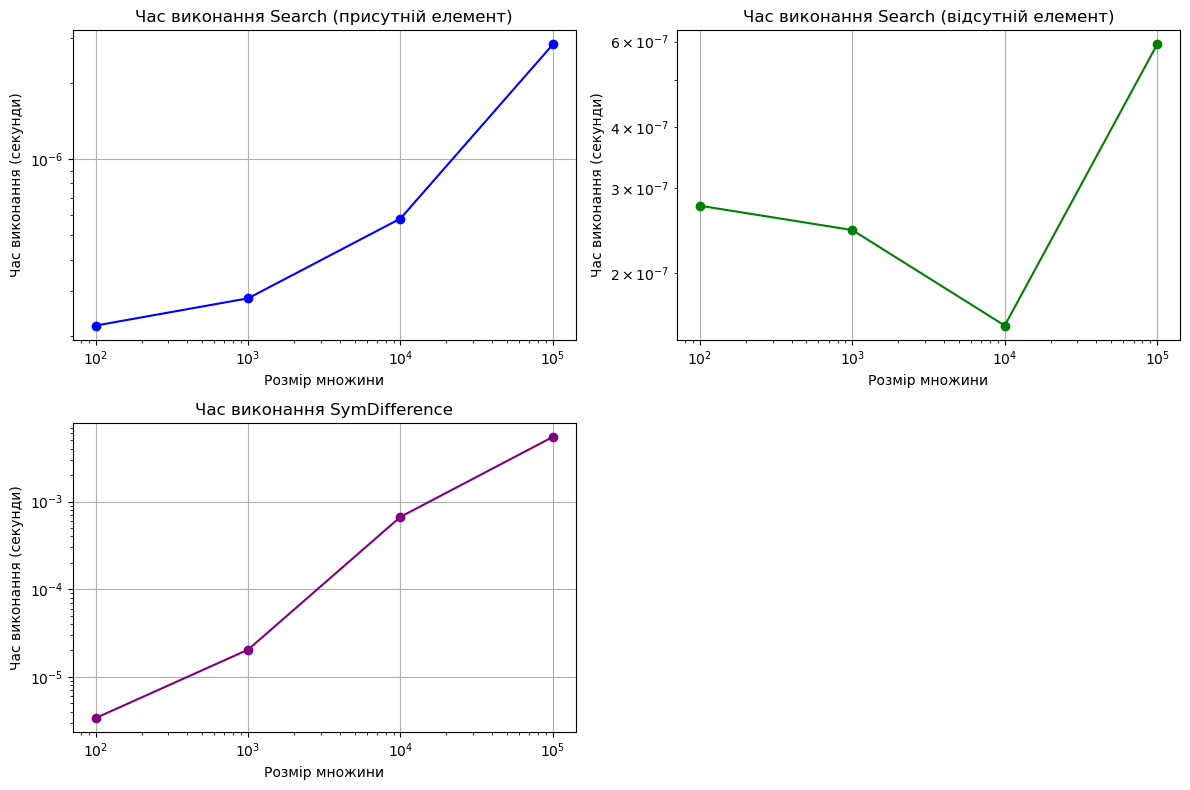

In [11]:
import time
import random
import matplotlib.pyplot as plt

def measure_operation_time_avg_search_and_sym_diff(elements, other_elements, repetitions=1000):
    total_search_present_time = 0
    total_search_absent_time = 0
    total_sym_diff_time = 0

    for _ in range(repetitions):
        s = Set(elements)
        other_set = Set(other_elements)
        random_present_element = random.choice(elements)  
        random_absent_element = max(other_elements) + random.randint(1, len(elements)) 

        start_time = time.perf_counter()
        s.search(random_present_element)
        total_search_present_time += time.perf_counter() - start_time

        start_time = time.perf_counter()
        s.search(random_absent_element)
        total_search_absent_time += time.perf_counter() - start_time

        start_time = time.perf_counter()
        s.elements.symmetric_difference(other_set.elements)
        total_sym_diff_time += time.perf_counter() - start_time

    return (total_search_present_time / repetitions, 
            total_search_absent_time / repetitions, 
            total_sym_diff_time / repetitions)

set_sizes = [100, 1000, 10000, 100000]

search_present_times = []
search_absent_times = []
sym_diff_times = []

# Вимірювання часу для кожного розміру множини
for size in set_sizes:
    elements = list(range(size))
    other_elements = list(range(size, size * 2))  
    
    search_present_t, search_absent_t, sym_diff_t = measure_operation_time_avg_search_and_sym_diff(elements, other_elements, repetitions=1000)
    search_present_times.append(search_present_t)
    search_absent_times.append(search_absent_t)
    sym_diff_times.append(sym_diff_t)

plt.figure(figsize=(12, 8))

# Search (присутній)
plt.subplot(2, 2, 1)
plt.plot(set_sizes, search_present_times, label='Search (присутній)', marker='o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Розмір множини')
plt.ylabel('Час виконання (секунди)')
plt.title('Час виконання Search (присутній елемент)')
plt.grid(True)

# Search (відсутній)
plt.subplot(2, 2, 2)
plt.plot(set_sizes, search_absent_times, label='Search (відсутній)', marker='o', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Розмір множини')
plt.ylabel('Час виконання (секунди)')
plt.title('Час виконання Search (відсутній елемент)')
plt.grid(True)

# SymDifference
plt.subplot(2, 2, 3)
plt.plot(set_sizes, sym_diff_times, label='SymDifference', marker='o', color='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Розмір множини')
plt.ylabel('Час виконання (секунди)')
plt.title('Час виконання SymDifference')
plt.grid(True)

plt.tight_layout()
plt.show()
